 ### Aniket Rajendra Shoste
 
# Objective           
Google Play Store team is about to launch a new feature where in certain apps that are
promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in
recommendations sections (“Similar apps”, “You might also like”, “New and updated games”).
These will also get a boost in visibility in search results. This feature will help bring more
attention to newer apps that have potential.
The task is to understand what makes an app perform well - size? price? category? multiple
factors together? Analyze the data and present your insights in a format consumable by
business – the final output of the analysis would be presented to business as insights with
supporting data/visualizations.

### Tasks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("playstore-analysis (2) (1).csv")

In [3]:
df                                                                                                            

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Size,10841.0,21516.529524,20746.537567,8.5,5900.0,18000.0,26000.0,100000.0


### 1. Data clean up – Missing value treatment

In [8]:
df.isna().sum().sum()

1487

In [9]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

###  a. Drop records where rating is missing since rating is our target/study variable

In [10]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [11]:
df = df.dropna( subset = [ 'Rating'] )

In [12]:
df.isna().sum().sum()

8

In [13]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### b. Check the null values for the Android Ver column.

In [14]:
  df.isna().sum() [ 'Android Ver']

3

In [15]:
df[df.isna().any(axis=1)] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.000000,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.000000,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.000000,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.000000,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### i. Are all 3 records having the same problem?
yes   they are having the same issue 

### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [16]:
  df.drop( 10472 , axis = 0 , inplace=True) 

C:\Users\ravAn\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
df[df.isna().any(axis=1)]               # to see the row is deleted

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


### iii. Replace remaining missing values with the mode

In [18]:
df['Android Ver'].value_counts().head(3)

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
Name: Android Ver, dtype: int64

In [19]:
 df['Android Ver'].mode()[0]

'4.1 and up'

In [20]:
df[ 'Android Ver'] = df['Android Ver'].fillna('4.1 and up')

C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/2555025847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ 'Android Ver'] = df['Android Ver'].fillna('4.1 and up')


In [21]:
df['Android Ver'].isna().sum()

0

In [22]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

### c. Current ver – replace with most common value

In [23]:
df['Current Ver'].value_counts().head(3)

Varies with device    1415
1.0                    458
1.1                    195
Name: Current Ver, dtype: int64

In [24]:
df['Current Ver'].mode()[0]

'Varies with device'

In [25]:
df[ 'Current Ver'] = df['Current Ver'].fillna('Varies with device')

C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/1841226771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ 'Current Ver'] = df['Current Ver'].fillna('Varies with device')


In [26]:
df[ 'Current Ver'].isna().sum()

0

In [27]:
df.isna().sum().sum()

0

###  Data is cleaned with null values

### 2. Data clean up – correcting the data types

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


### a. Which all variables need to be brought to numeric types?


###
df['Rating']  
df['Reviews'] 
df['Size'] 
df['Price']
df['Installs]
df['Last Updated']   these are the variables need to change their data types

### b. Price variable – remove $ sign and convert to float

In [29]:
df['Price'] = df['Price'].str.replace('$' , ' ')

C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/3748552636.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$' , ' ')
C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/3748552636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace('$' , ' ')


In [30]:
df['Price'] = df['Price'].astype(float)

C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/2832233996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(float)


### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [31]:
df['Installs'] = df['Installs'].str.replace('+','')

C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/2045748454.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')
C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/2045748454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].str.replace('+','')


In [32]:
df['Installs']  = df['Installs'].str.replace(',','')

C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/4028096625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs']  = df['Installs'].str.replace(',','')


In [33]:
df['Installs']  = df['Installs'].astype(int) 

C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/4286539698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs']  = df['Installs'].astype(int)


### d. Convert all other identified columns to numeric

In [34]:
df['Rating']  = df['Rating'].astype(float)
df['Reviews'] =  df['Reviews'].astype(int)
df['Size']  = df['Size'].astype(int) 

C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/1793993200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating']  = df['Rating'].astype(float)
C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/1793993200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews'] =  df['Reviews'].astype(int)
C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/1793993200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [35]:
df['Last Updated']  = pd.to_datetime(df['Last Updated'])

C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/1660858302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last Updated']  = pd.to_datetime(df['Last Updated'])


In [36]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 914.6+ KB


### 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.
i. Are there any such records? Drop if so.

In [38]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [39]:
df['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

### b. Reviews should not be more than installs as only those who installed can review the app.
i. Are there any such records? Drop if so.

In [40]:
df[df['Reviews'] > df['Installs'] ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516,10000,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up


In [41]:
df.drop(index = [ 2454 , 4663, 5917 ,6700 ,7402 ,8591 ,10697] , axis =1  , inplace=True)

C:\Users\ravAn\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
df[df['Reviews'] > df['Installs'] ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


###  OR
we can also do this with an alternate meathod aslo as fallows

In [43]:
df1 = pd.DataFrame()
df1 = df[df.Reviews <= df.Installs]
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [44]:
df1[df1['Reviews'] >df1['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 4. Identify and handle outliers – 


### a. Price column
i. Make suitable plot to identify outliers in price

C:\Users\ravAn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


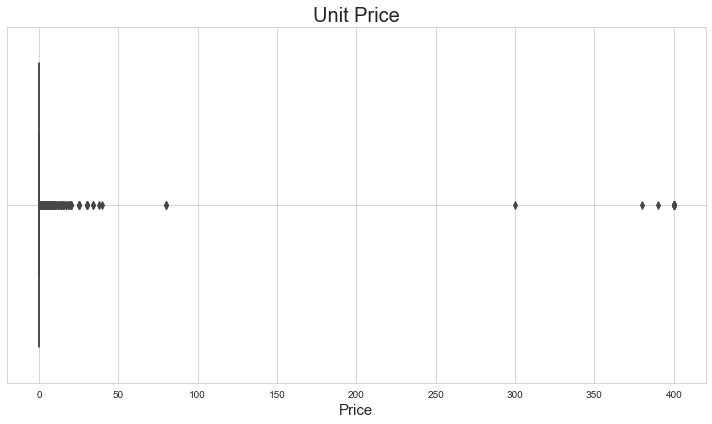

In [45]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,6))
sns.boxplot(df['Price'], palette= 'magma' )
plt.grid(linestyle='-')
plt.title('Unit Price' ,size =20)
plt.xlabel('Price' ,size =15)
plt.tight_layout()

### 
ii. Do you expect apps on the play store to cost $200? Check out these cases

In [46]:
df[df['Price'] == 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 
iii. After dropping the useless records, make the suitable plot again to identify
outliers"

C:\Users\ravAn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


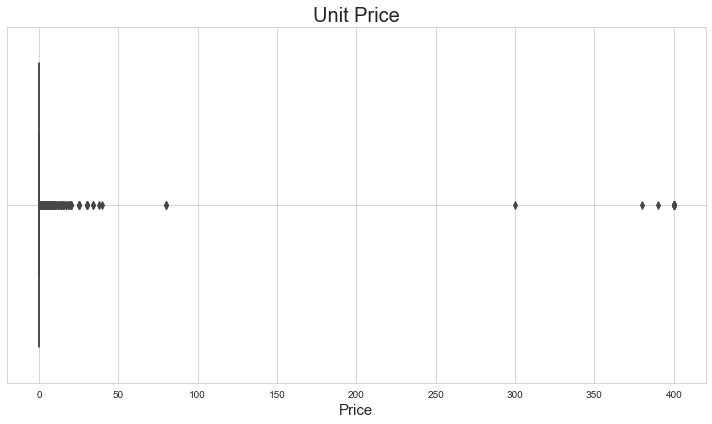

In [47]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,6))
sns.boxplot(df['Price'], palette= 'magma' )
plt.grid(linestyle='-')
plt.title('Unit Price' ,size =20)
plt.xlabel('Price' ,size =15)
plt.tight_layout()

### 
iv. Limit data to records with price < $30

In [48]:
 df[df['Price'] < 30 ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [49]:
df= df.drop(df[df["Price"] > 30].index)
df.shape

(9338, 13)

###  b. Reviews column### 
i. Make suitable plot

In [50]:
df[['Reviews' , 'Category' , 'Genres']]

,Reviews,Category,Genres
0,159,ART_AND_DESIGN,Art & Design
1,967,ART_AND_DESIGN,Art & Design;Pretend Play
2,87510,ART_AND_DESIGN,Art & Design
3,215644,ART_AND_DESIGN,Art & Design
4,967,ART_AND_DESIGN,Art & Design;Creativity
...,...,...,...
10834,7,FAMILY,Education
10836,38,FAMILY,Education
10837,4,FAMILY,Education
10839,114,BOOKS_AND_REFERENCE,Books & Reference


In [52]:
c = df.groupby('Category')['Reviews'].sum().sort_values(ascending=True)
c

Category
EVENTS                     160590
BEAUTY                     395133
PARENTING                  953609
LIBRARIES_AND_DEMO        1033535
AUTO_AND_VEHICLES         1163630
MEDICAL                   1585000
ART_AND_DESIGN            1714372
COMICS                    3381945
HOUSE_AND_HOME            3976004
DATING                    7291039
FOOD_AND_DRINK            8883009
LIFESTYLE                12866394
BUSINESS                 13954086
WEATHER                  14604695
FINANCE                  17547629
BOOKS_AND_REFERENCE      21958660
MAPS_AND_NAVIGATION      30659060
HEALTH_AND_FITNESS       37893622
EDUCATION                39595010
NEWS_AND_MAGAZINES       54399899
ENTERTAINMENT            59178154
TRAVEL_AND_LOCAL         62617772
SPORTS                   70829568
PERSONALIZATION          89345815
VIDEO_PLAYERS           110379692
PRODUCTIVITY            114116717
SHOPPING                115041033
PHOTOGRAPHY             213516607
TOOLS                   273184168
FAMIL

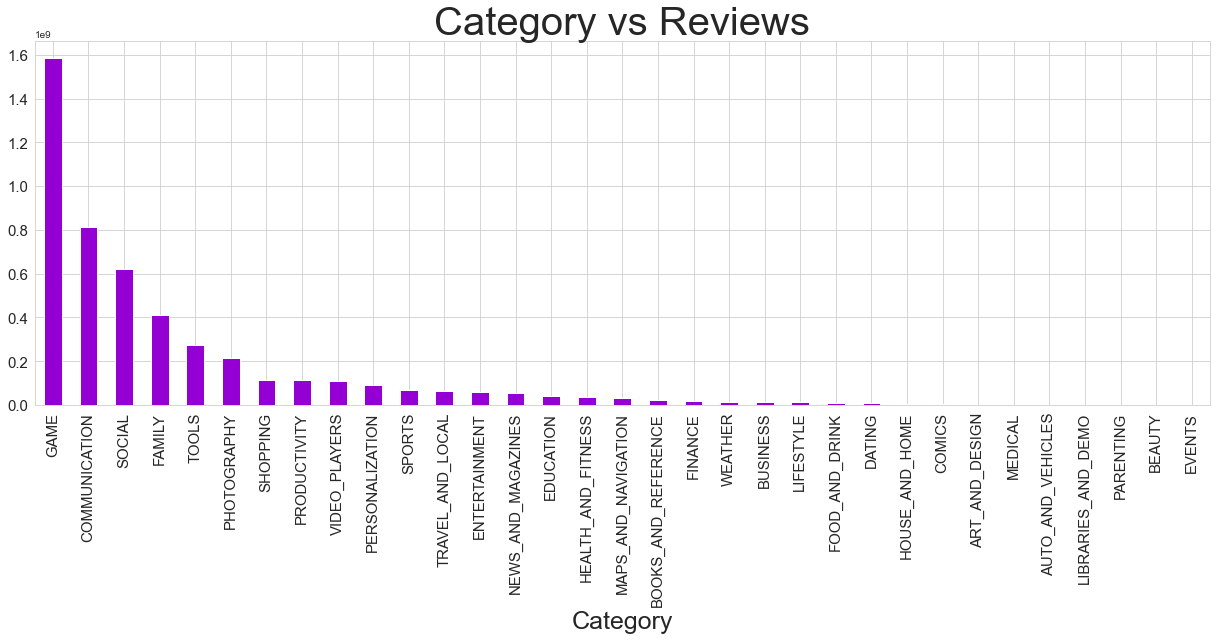

In [53]:
sns.set_style('whitegrid')
fig = plt.figure(figsize= (17,9))
c = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
c.plot(kind='bar', fontsize=15 , color = 'darkviolet')
plt.xlabel("Category", size=25)
plt.title('Category vs Reviews' ,size =40)
plt.tight_layout() 

## 
ii. Limit data to apps with < 1 Million reviews

In [54]:
m = df[df['Reviews'] < 1000000]

In [55]:
m.head(6)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up


### c. Installs
i. What is the 95th percentile of the installs?

In [56]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9338.0,4.191776e+00,5.150315e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,9338.0,5.155891e+05,3.148627e+06,1.0,189.0,6011.5,82471.0,7.815831e+07
Size,9338.0,2.272570e+04,2.131035e+04,8.0,6600.0,21000.0,27000.0,1.000000e+05
Installs,9338.0,1.795108e+07,9.136965e+07,5.0,10000.0,500000.0,5000000.0,1.000000e+09
Price,9338.0,3.019148e-01,1.669887e+00,0.0,0.0,0.0,0.0,2.999000e+01


In [57]:
df['Installs'].describe() 

count    9.338000e+03
mean     1.795108e+07
std      9.136965e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [58]:
df['Installs'].quantile(0.95)

100000000.0

### 
ii. Drop records having a value more than the 95th percentile

In [59]:
df[(df['Installs'])> (df['Installs'].quantile(0.95))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,21516,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,21516,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,21516,1000000000,Free,0.0,Everyone,Photography,2018-08-01,Varies with device,Varies with device
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70000,500000000,Free,0.0,Everyone,Health & Fitness,2018-07-31,5.17.2.009,5.0 and up
5856,Google Play Games,FAMILY,4.3,7168735,21516,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516,500000000,Free,0.0,Everyone,Tools,2018-08-04,4.6.6,Varies with device


In [60]:
df['Installs'].dropna().quantile(0.95)

100000000.0

In [61]:
df[df.Installs < np.percentile(df.Installs,95)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


### Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower  values?
a. How do you explain this?
As most of the Ratings  between 4 and 5

b. What is the implication of this on your analysis? Analysis of ratings will be more towards the major  side of Density / Kde curve

C:\Users\ravAn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


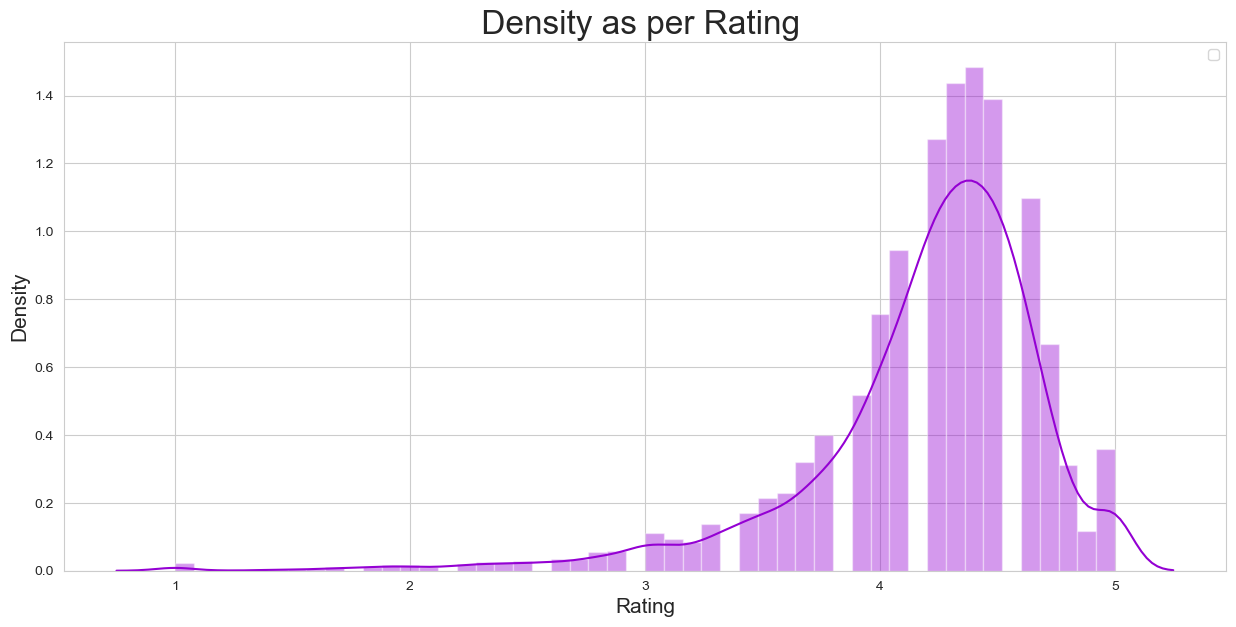

In [62]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,7) ,dpi =100)
sns.distplot(df['Rating'] , color = 'darkviolet' , kde =True)
plt.xlabel('Rating' ,fontsize =15)
plt.ylabel('Density' ,fontsize =15)
plt.title(' Density as per Rating  ' ,size =24)
plt.legend()

### .6 What are the top Content Rating values?
a. Are there any values with very few records?
. If yes, drop those as they won’t help in the analysisb

In [63]:
df['Content Rating'].nunique()

6

In [64]:
df['Content Rating'].value_counts() 

Everyone           7394
Teen               1082
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### 
a. Are there any values with very few records?
Yes , following are the values which have few records

In [65]:
 c = df['Content Rating'].value_counts().sort_values(ascending =True) 
c

Unrated               1
Adults only 18+       3
Everyone 10+        397
Mature 17+          461
Teen               1082
Everyone           7394
Name: Content Rating, dtype: int64

In [66]:
df['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10834      Everyone
10836      Everyone
10837      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 9338, dtype: object

In [67]:
 df['Content Rating'].value_counts().sort_values(ascending =True) 

Unrated               1
Adults only 18+       3
Everyone 10+        397
Mature 17+          461
Teen               1082
Everyone           7394
Name: Content Rating, dtype: int64

### 
b. If yes, drop those as they won’t help in the analysis ? yes

In [68]:
 ar =  df[df['Content Rating'] == 'Adults only 18+'].index.to_list()
df.drop(ar , inplace = True)

In [69]:
un = df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(un, inplace = True)

In [70]:
df['Content Rating'].value_counts()

Everyone        7394
Teen            1082
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

### 7. Effect of size on rating


a. Make a joinplot to understand the effect of size on rating

No handles with labels found to put in legend.


<Figure size 1152x432 with 0 Axes>

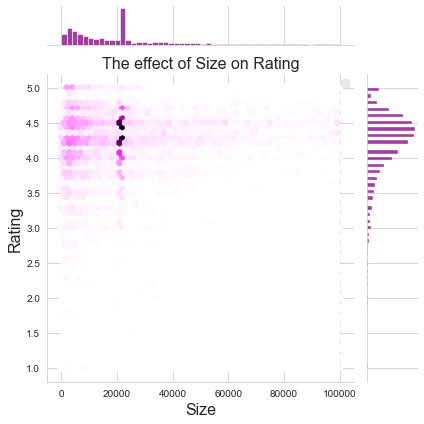

In [71]:
fig = plt.figure(figsize = (16,6))
sns.jointplot(x = 'Size', y ='Rating' , data = df , kind = 'hex' ,color = 'purple' ,)
plt.xlabel('Size' ,size =16)
plt.ylabel('Rating' ,size =16)
plt.style.use('ggplot')
plt.title('The effect of Size on Rating' ,size =16)
plt.legend(loc =1 )
plt.tight_layout()

b. Do you see any patterns? we can see a dark dense straight  line

 c. How do you explain the pattern?  Their are more applications which are or size 20000 mb which have the highest rating range between 3.5 -4.5

### 8. Effect of price on rating

a. Make a jointplot (with regression line)

C:\Users\ravAn\AppData\Local\Temp/ipykernel_67232/3333120736.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


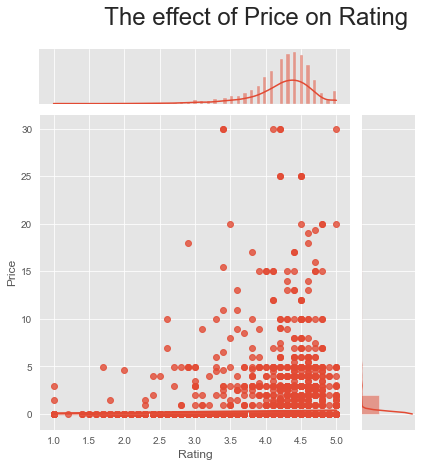

In [72]:

sns.jointplot(x= 'Rating' ,y = 'Price' ,data =df , kind ='reg')
plt.title(' The effect of Price on Rating ',loc = 'right',pad =90,size =24)
plt.xlabel('Rating' ,size =20)
plt.ylabel('Price' ,size =20)
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

b. What pattern do you see? we can se some high price  as the curve has raised with respect to the  rating at a certain position.

c. How do you explain the pattern? 
Their are some apps  which have rating from 3.5 -4.5 having high price but the majority are of resonable prices 

d. Replot the data, this time with only records with price > 0

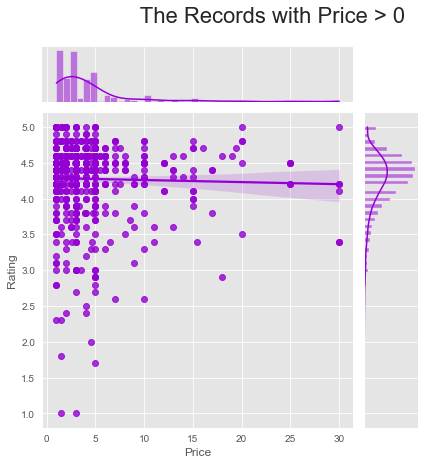

In [73]:
Price_greater= df[df['Price'] > 0]
sns.jointplot(x ="Price" , y = df['Rating'],data = Price_greater , kind = "reg" , color ='darkviolet' )
plt.xlabel('Price' ,size =20)
plt.ylabel('Rating' ,size =20)
plt.title(' The Records with Price > 0  ',loc = 'right',pad =90,size =22)
plt.show() 

e. Does the pattern change? it does not shows a major diference as it conveys the same information

f. What is your overall inference on the effect of price on the rating? If the Price is high it has a high probability that it will have a rating between 3.5 -4.5 

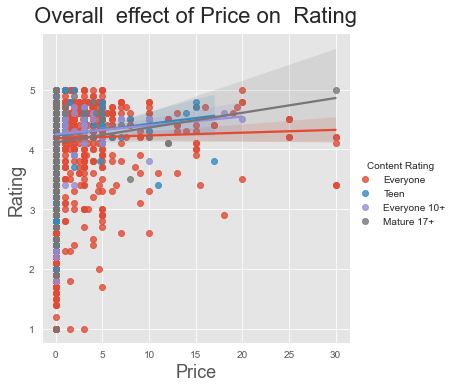

In [74]:
 sns.lmplot(x='Price' ,y = 'Rating' ,data =df , hue ='Content Rating')
plt.xlabel('Price' ,size =18)
plt.ylabel('Rating' ,size =18)
plt.title(' Overall  effect of Price on  Rating ',loc = 'center',pad = 12,size =22)
plt.show() 

### 9. Look at all the numeric interactions together –
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

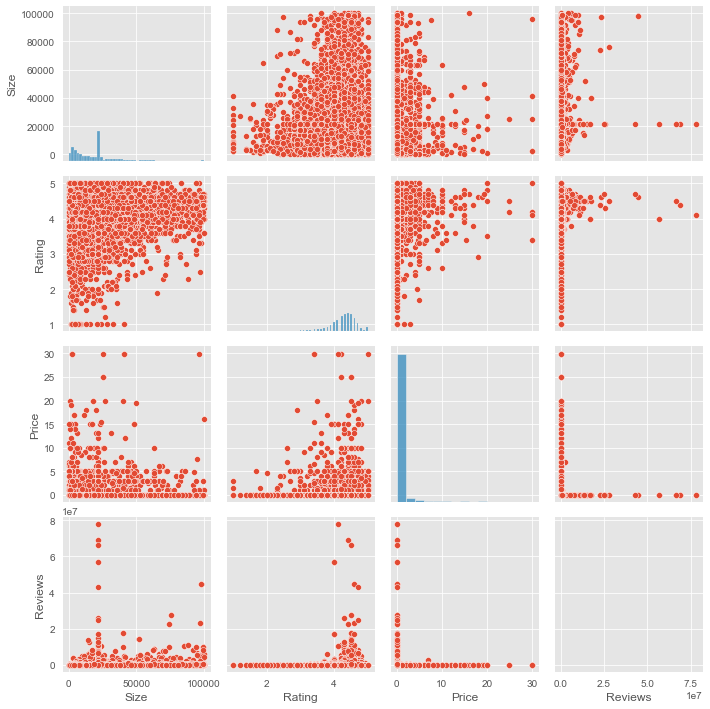

In [81]:
sns.pairplot(df, vars=[ 'Size','Rating' ,'Price','Reviews' ,]) 

In [82]:
from ipywidgets import interactive
def size_widget (height =2.5,aspect=1):
    sns.pairplot(df, vars=[ 'Size','Rating' ,'Price','Reviews'],palette= 'plasma',height=height,aspect=aspect)


In [83]:
interactive(size_widget,height= (1,3.5,0.5),aspect=(0.5,2,0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

### 10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

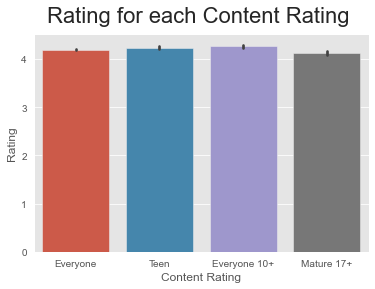

In [105]:
sns.barplot(x='Content Rating' , y ='Rating' ,data= df)
plt.title('Rating for each Content Rating ',loc = 'center',pad = 12,size =22)
plt.show() 

b. Which metric would you use? Mean? Median? Some other quantile?

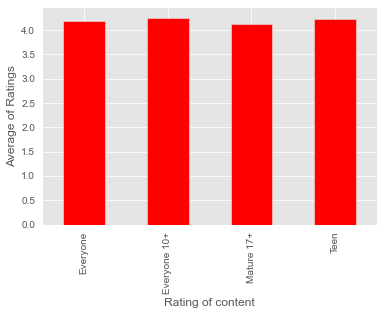

In [96]:
b = df['Rating'].groupby(df['Content Rating']).mean().plot(kind = 'bar',color = 'red')
b.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

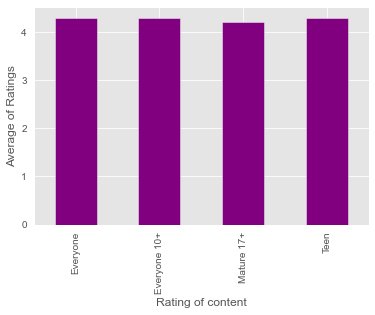

In [106]:
a = df['Rating'].groupby(df['Content Rating']).median().plot(kind = 'bar',color = 'purple')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

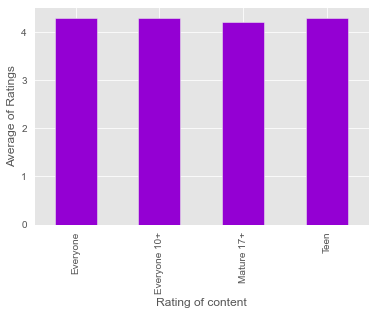

In [89]:
a = df['Rating'].groupby(df['Content Rating']).quantile().plot(kind = 'bar',color = 'darkviolet')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

c. Choose the right metric and plot

Text(0, 0.5, 'Rating')

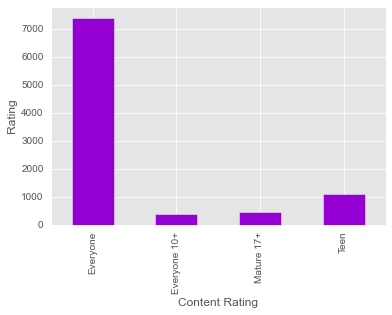

In [90]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkviolet")
plt.ylabel('Rating')

In [91]:
df['Content Rating'].value_counts()

Everyone        7394
Teen            1082
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

In [92]:
df['Content Rating'].mode()        # just to see what shows with mode

0    Everyone
dtype: object

<AxesSubplot:ylabel='Rating'>

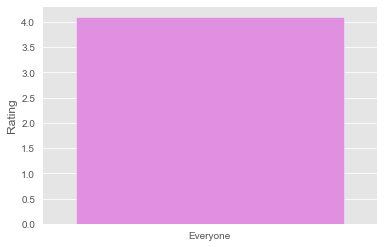

In [98]:
sns.barplot(x = df['Content Rating'].mode() , y = 'Rating', data = df, color = 'violet')

### 11. Content rating vs. size vs. rating – 3 variables at a time


a. Create 5 buckets (20% records in each) based on Size

C:\Users\ravAn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

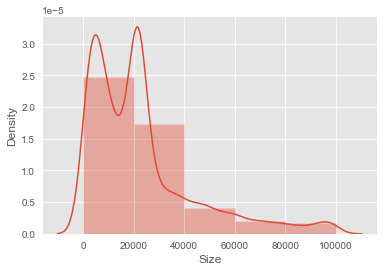

In [99]:

sns.distplot(df["Size"], bins=5 )

In [100]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
df['Bucket_sizes'] = pd.cut(df['Size'], bins, labels=['Very Low','Low','Medi','High','Very High'])

In [101]:
df['Bucket_sizes']

0             Medi
1             Medi
2              Low
3             High
4         Very Low
           ...    
10834     Very Low
10836    Very High
10837     Very Low
10839         Medi
10840         Medi
Name: Bucket_sizes, Length: 9334, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medi' < 'High' < 'Very High']

In [117]:
pd.pivot_table(df, values='Rating', index='Bucket_sizes',columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket_sizes,,,,
Very Low,4.116056,4.188889,3.951429,4.224490
Low,4.161317,4.207143,4.129592,4.209655
Medi,4.242463,4.262602,4.091975,4.205630
High,4.179122,4.209375,4.168333,4.213158
Very High,4.208134,4.287805,4.197170,4.279603


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [118]:
df[['Size','Rating']].quantile([0.2,0.4,0.6,0.8])

,Size,Rating
0.2,5100.0,3.9
0.4,14000.0,4.2
0.6,21516.0,4.4
0.8,34000.0,4.6


c. Make a heatmap of this i. Annotated ii. Greens color map

In [102]:
new =  pd.DataFrame()
new =  pd.pivot_table(df, values='Rating', index='Bucket_sizes', 
                       columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
new

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket_sizes,,,,
Very Low,3.8,3.84,3.28,3.90
Low,3.8,3.94,3.64,3.88
Medi,4.0,4.10,3.90,3.90
High,3.9,4.00,3.90,4.00
Very High,3.9,4.10,4.00,4.00


Text(34.0, 0.5, 'Bucket_sizes')

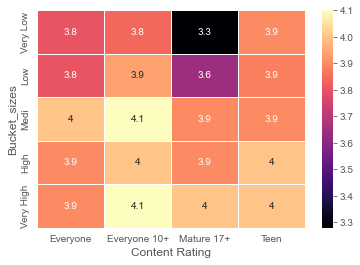

In [103]:
sns.heatmap(new, annot=True ,cmap = 'magma',linewidths=1,linecolor='white')
plt.xlabel('Content Rating',size=12)
plt.ylabel('Bucket_sizes',size=12)

Text(34.0, 0.5, 'Bucket_sizes')

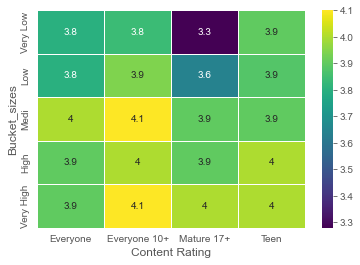

In [104]:
sns.heatmap(new, annot=True ,cmap ='viridis',linewidths=1,linecolor='white')
plt.xlabel('Content Rating',size=12)
plt.ylabel('Bucket_sizes',size=12)

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?  As fromm the correlation between Content Rating and Bucket_size of the apps we can see that  Medium size apps are prefered the most for everyone  as  well as in mature 17 + and in Teen as they love games , Educations , and more stuff which requires Heavier apps